# ***Training Model***

## **Required Libraries**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from xgboost import XGBClassifier
import joblib

## **Read Data**

In [35]:
csv_clean = '../data/MLA_100k_clean.csv'
df = pd.read_csv(csv_clean)

In [7]:
df.head(5)

,condition,listing_type_id,price,buying_mode,accepts_mercadopago,automatic_relist,status,initial_quantity,available_quantity,free_shipping,mode,local_pick_up
0,new,bronze,80.0,buy_it_now,True,False,active,1,1,False,not_specified,True
1,used,silver,2650.0,buy_it_now,True,False,active,1,1,False,me2,True
2,used,bronze,60.0,buy_it_now,True,False,active,1,1,False,me2,True
3,new,silver,580.0,buy_it_now,True,False,active,1,1,False,me2,True
4,used,bronze,30.0,buy_it_now,True,False,active,1,1,False,not_specified,True


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99372 entries, 0 to 99371
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   condition            99372 non-null  object 
 1   listing_type_id      99372 non-null  object 
 2   price                99372 non-null  float64
 3   buying_mode          99372 non-null  object 
 4   accepts_mercadopago  99372 non-null  bool   
 5   automatic_relist     99372 non-null  bool   
 6   status               99372 non-null  object 
 7   initial_quantity     99372 non-null  int64  
 8   available_quantity   99372 non-null  int64  
 9   free_shipping        99372 non-null  bool   
 10  mode                 99372 non-null  object 
 11  local_pick_up        99372 non-null  bool   
dtypes: bool(4), float64(1), int64(2), object(5)
memory usage: 6.4+ MB


In [10]:
initial_df = df.columns
df.columns

Index(['condition', 'listing_type_id', 'price', 'buying_mode',
       'accepts_mercadopago', 'automatic_relist', 'status', 'initial_quantity',
       'available_quantity', 'free_shipping', 'mode', 'local_pick_up'],
      dtype='object')

## **Model Creation**

For this case we will replace the **“condition”** column with the new and used values by 0 and 1.
* used = 0
* new = 1

In [36]:
le = LabelEncoder()
df['condition'] = le.fit_transform(df['condition'])

In [37]:
df = pd.get_dummies(df, columns=['listing_type_id', 'buying_mode', 'status', 'mode'])

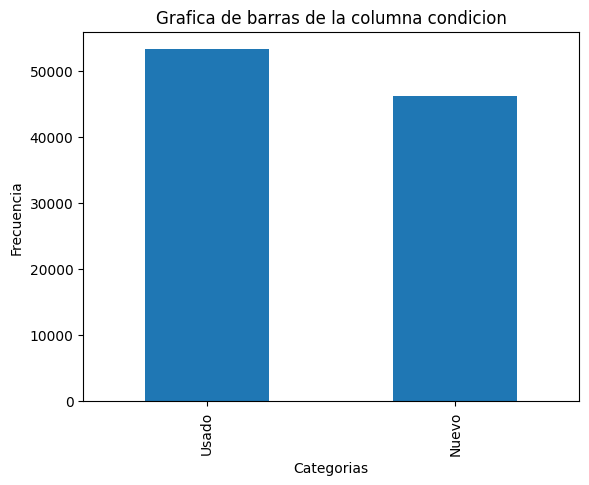

In [38]:
conteo_valores = df['condition'].value_counts()

conteo_valores.plot(kind='bar')

plt.xlabel('Categorias')
plt.ylabel('Frecuencia')
plt.title('Grafica de barras de la columna condicion')
plt.xticks(ticks=[0, 1], labels=['Usado', 'Nuevo'])

plt.show()

## **Training And Testing**

In [52]:
X = df.drop('condition', axis=1)
y = df['condition']

if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n========== {name} ==========")
    print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score : {f1_score(y_test, y_pred):.4f}")
    print(f"Roc-Auc : {roc_auc_score(y_test, y_pred):.4f}")


========== Logistic Regression ==========
Accuracy : 0.7335
Precision: 0.9038
Recall   : 0.4771
F1-Score : 0.6245
Roc-Auc : 0.7165

========== Random Forest ==========
Accuracy : 0.8212
Precision: 0.7762
Recall   : 0.8643
F1-Score : 0.8179
Roc-Auc : 0.8240

========== Decision Tree ==========
Accuracy : 0.8191
Precision: 0.7778
Recall   : 0.8549
F1-Score : 0.8145
Roc-Auc : 0.8215


c:\Users\kevin\Github\ml_exercise\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:27:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



========== XGBoost ==========
Accuracy : 0.8300
Precision: 0.8059
Recall   : 0.8353
F1-Score : 0.8203
Roc-Auc : 0.8303

========== Gradient Boosting ==========
Accuracy : 0.8212
Precision: 0.8097
Recall   : 0.8041
F1-Score : 0.8069
Roc-Auc : 0.8200

========== KNN ==========
Accuracy : 0.8064
Precision: 0.7820
Recall   : 0.8088
F1-Score : 0.7952
Roc-Auc : 0.8066


The **XGBoost** model proved to be the most effective classifier for predicting whether a product is new or used. Among all evaluated models, it achieved the highest F1-Score (0.8203), demonstrating the best balance between precision and recall.


c:\Users\kevin\Github\ml_exercise\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:25:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


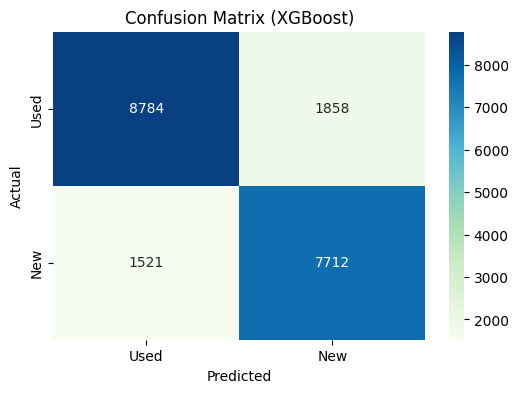

In [49]:
best_model = XGBClassifier(eval_metric='mlogloss', random_state=42, use_label_encoder=False)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='GnBu',
            xticklabels=['Used', 'New'],
            yticklabels=['Used', 'New'])
plt.title('Confusion Matrix (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

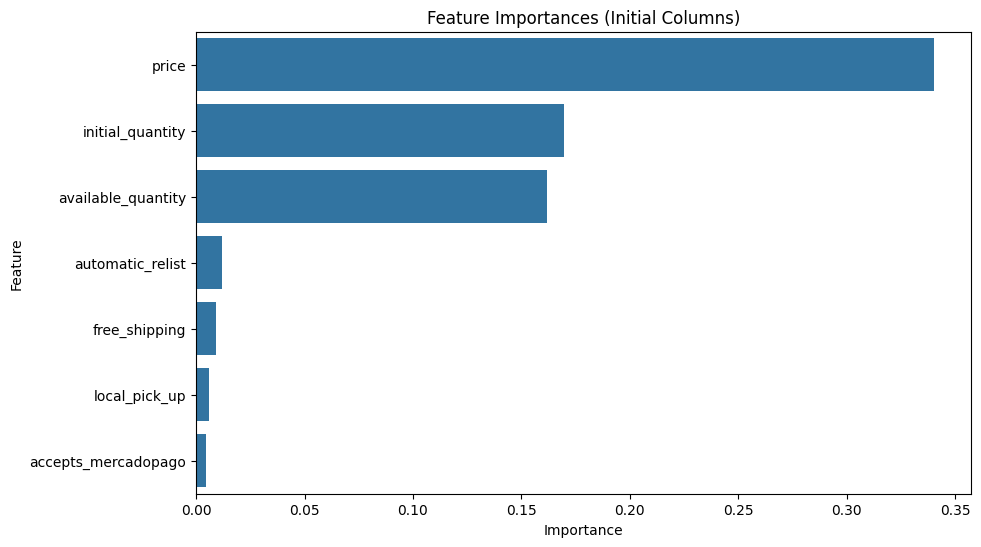

In [63]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df[feature_importance_df['Feature'].isin(initial_df)]
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (Initial Columns)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## **Save Model**

In [64]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

joblib.dump(rf, '../model/XGBoost.pkl')
print("Modelo guardado exitosamente")

Modelo guardado exitosamente
